In [ ]:
!git clone https://github.com/TrongNV2003/T5-QA-Generator

Cloning into 'MCQ_generator'...
remote: Enumerating objects: 675, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 675 (delta 4), reused 11 (delta 2), pack-reused 659
Receiving objects: 100% (675/675), 280.10 KiB | 3.29 MiB/s, done.
Resolving deltas: 100% (382/382), done.


In [ ]:
cd /content/T5-QA-Generator

/content/MCQ_generator


**Training Model**

In [ ]:
!python training/train_qa.py

tokenizer_config.json: 100% 2.20k/2.20k [00:00<00:00, 13.8MB/s]
spiece.model: 100% 820k/820k [00:00<00:00, 16.7MB/s]
special_tokens_map.json: 100% 2.12k/2.12k [00:00<00:00, 15.6MB/s]
tokenizer.json: 100% 2.40M/2.40M [00:00<00:00, 26.0MB/s]
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Training with learning rate: 2e-05
config.json: 100% 702/702 [00:00<00:00, 4.57MB/s]
pytorch_model.bin: 100% 904M/904M [00:04<00:00, 218MB/s]
epoch 1:   0% 0/75 [00:00<?, ?batches/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatibl

In [ ]:
!python training/train_qa_mcq.py

tokenizer_config.json: 100% 238/238 [00:00<00:00, 1.55MB/s]
config.json: 100% 846/846 [00:00<00:00, 6.02MB/s]
vocab.txt: 100% 207k/207k [00:00<00:00, 3.51MB/s]
special_tokens_map.json: 100% 112/112 [00:00<00:00, 736kB/s]
Training with learning rate: 2e-05
pytorch_model.bin: 100% 443M/443M [00:08<00:00, 49.8MB/s]
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at trituenhantaoio/bert-base-vietnamese-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
epoch 1: 100% 38/38 [00:39<00:00,  1.05s/batches, train_loss=0.727]
validation: 100% 7/7 [00:01<00:00,  3.91batches/s, valid_acc=0.446]
Validation accuracy improved from 0.0000 to 0.4464. Saving.
validation: 100% 7/7 [00:01<00:00,  4.05batches/s, valid_loss=0.677]
epoch 2: 100% 38/38 [00:28<00:00,  1.35batches/s, train_loss=0.722]
validation: 100% 7/7 [00:01<00:00

In [ ]:
!python training/train_distractors.py

**Evaluate model**

In [ ]:
!python training/test_qa.py

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
validation: 100% 6/6 [00:03<00:00,  1.96batches/s, valid_loss=0.644]
validation: 100% 6/6 [00:04<00:00,  1.39batches/s, valid_acc=0.228]


**Execute model** (2 ways)

In [ ]:
!python run_qa.py

In [ ]:
%load questiongenerator.py
from questiongenerator import QuestionGenerator
from questiongenerator import print_qa
from questiongenerator import save_qa_to_txt
qg = QuestionGenerator()


article = "Từ lý luận của chủ nghĩa Mác - Lênin, Đảng Cộng sản Việt Nam đã rút ra bài học quan trọng là Mọi đường lối, chủ trương của Đảng phải xuất phát từ thực tế, tôn trọng quy luật khách quan . Đất nước ta đang bước vào thời kỳ đẩy mạnh công nghiệp hóa và hiện đại hóa, Đảng chủ trương: huy động ngày càng cao mọi nguồn lực cả trong và ngoài nước, đặc biệt là nguồn lực của dân vào công cuộc phát triển đất nước , muốn vậy  phải nâng cao năng lực lãnh đạo và sức chiến đấu của Đảng phát huy sức mạnh toàn dân tộc, đẩy mạnh toàn diện công cuộc đổi mới, sớm đưa nước ta ra khỏi tình trạng kém phát triển, thực hiện dân giàu, nước mạnh, xã hội công bằng, dân chủ, văn minh."

qa_list = qg.generate(
    article,
    num_questions=3,
    answer_style='sentences'
)
# print_qa(qa_list, show_answers=False)
print_qa(qa_list, show_answers=True)
# qg.save_questions_to_file(qa_list, "questions.txt")

# Sử dụng hàm để lưu output
output_file_path = "generated_questions.txt"
save_qa_to_txt(qa_list, output_file_path)
print(f"Output đã được lưu vào file '{output_file_path}'")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Generating questions...

Evaluating QA pairs...

('\nWas only able to generate 2 questions.', 'For more questions, please input a longer text.')
1) Q: Ai là người đã rút ra bài học quan trọng?
   A: Từ lý luận của chủ nghĩa Mác - Lênin, Đảng Cộng sản Việt Nam đã rút ra bài học quan trọng là Mọi đường lối, chủ trương của Đảng phải xuất phát từ thực tế, tôn trọng quy luật khách quan.

      Confidence: 0

2) Q: Ai chủ trương: huy động mọi nguồn lực cho công cuộc đổi mới?
   A: Đất nước ta đang bước vào thời kỳ đẩy mạnh công nghiệp hóa và hiện đại hóa, Đảng chủ trương: huy động ngày càng cao mọi nguồn lực cả trong và ngoài nước, đặc biệt là nguồn lực của dân vào công cuộc phát triển đất nước, muốn vậy phải nâng cao năng lực lãnh đạo và sức chiến đấu của Đảng phát huy sức mạnh toàn dân tộc, đẩy mạnh toàn diện công cuộc đổi mới, sớm đưa nước ta ra khỏi tình trạng kém phát triển, thực hiện dân giàu, nước mạnh, xã hội công bằng, dân chủ, văn minh.

      Confidence: 1

Output đã được lưu vào 

**Plot the result of output**

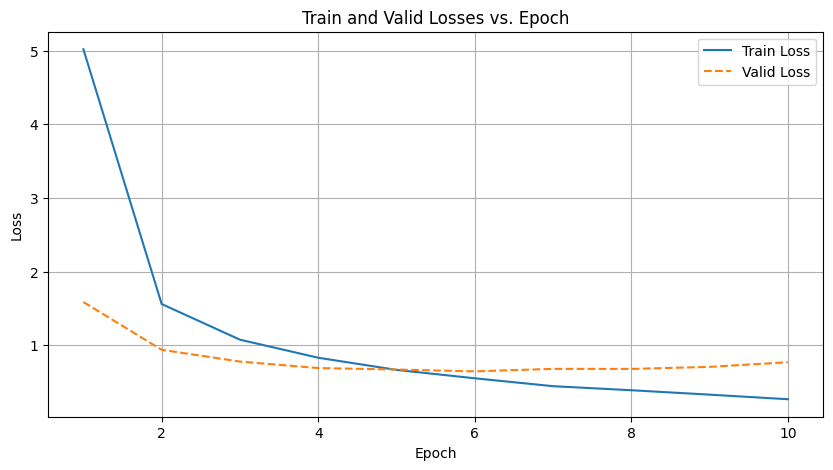

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
df = pd.read_csv('result/qg_training_log.csv')

# Plot train_loss và valid_loss
plt.figure(figsize=(10, 5))

# Plot train_loss
plt.plot(df['epoch'], df['train_loss'], label='Train Loss', linestyle='-')

# Plot valid_loss
plt.plot(df['epoch'], df['valid_loss'], label='Valid Loss', linestyle='--')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Valid Losses vs. Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
plt.plot(df['epoch'], df['train_loss'], label='Train Loss', linestyle='-')

# Plot valid_loss
plt.plot(df['epoch'], df['valid_loss'], label='Valid Loss', linestyle='--')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Valid Losses vs. Epoch')
plt.legend()
plt.grid(True)
plt.show()

**Evaluate model score**

In [10]:
## setup scorer
!python setup_scorer.py

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,118 kB]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 2,351 kB in 1s (2,128 kB/s)
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state informati

In [45]:
## evaluation
!python nqg/qgevalcap/eval.py \
  --src datasets/score_evaluation/predict.txt \
  --tgt datasets/score_evaluation/tgt-test.txt \
  --out datasets/score_evaluation/predict.txt

scores: 

Bleu_1: 0.96255
Bleu_2: 0.96167
Bleu_3: 0.96073
Bleu_4: 0.95972
METEOR: 0.72611
ROUGE_L: 0.95826
